### $\alpha$-QAOA

Similar to $\alpha$-VQE where a free parameter is used to balance the circuit depth, iteration and error, using both variational form and quantum phase estimation

#### Understanding FFT

Whittaker-Nyquist-Kotelnikov-Shannon Sampling theorem is a fundamental bridge between continuous-time (analog) signals and discrete-time (digital) signals. The sufficient condition for a sample rate that permits a discrete sequence of samples to capture all the information from a continuous-time signal of finite bandwidth is: If a function $x(t)$ contains no frequencies higher than $B$ hertz, it is completely determined by giving its ordinates at a series of points spaced $1/(2B)$ seconds apart.
$$\omega_i = 2\pi f_i$$
$$x(t) = \sum_{i}a_i sin(\omega_i t)$$
$$\Delta t = 1/fs$$

Text(0,0.5,'Amplitude')

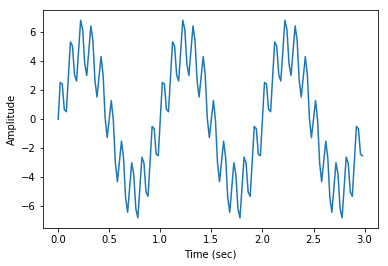

In [84]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

f_s = 50.0 # Sampling frequency in Hz
T = 3.0 # Total time

f = [1.0, 10.0] # Frequencies in signal in Hz
a = [5.0,  2.0] # Corresponding amplitudes

ti = np.arange(0.0, T, 1/f_s)
N = len(ti) # Total number of samples = f_s*T
xt = np.zeros(N)
for i in range(len(f)):
    wi = 2 * np.pi * f[i]
    xt += a[i] * np.sin(wi * ti)

plt.plot(ti, xt)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")

using numpy

Text(0,0.5,'Amplitude')

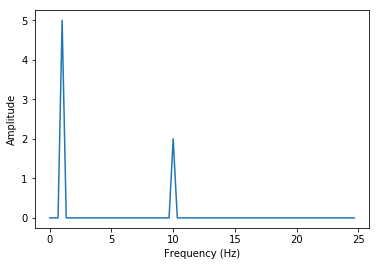

In [64]:
fft_x = np.fft.fft(xt)
freq = np.fft.fftfreq(len(fft_x), 1/f_s)

half_n = int(np.ceil(len(fft_x)/2.0))
fft_x_half = (2.0 / len(fft_x)) * fft_x[:half_n]
freq_half = freq[:half_n]

plt.plot(freq_half, np.abs(fft_x_half))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

Discrete Fourier Transform converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency.

$$F:C^N \rightarrow C^N$$
$$X(f) = \sum_t x(t).e^{-i2\pi ft/N}$$

Text(0,0.5,'Amplitude')

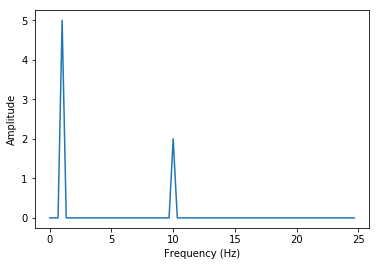

In [91]:
#print(fft_x,len(fft_x),N)
Xf = np.zeros(N,dtype=complex)
for fi in range(N):
    wi = 2 * np.pi * fi
    for i in range(N):
        Xf[fi] += xt[i] * np.exp(np.complex(0,-1) * wi * i / N)
    
freq = np.fft.fftfreq(N, 1/f_s)
half_n = int(np.ceil(N/2.0))
fft_x_half = (2.0 / N) * Xf[:half_n]
freq_half = freq[:half_n]

plt.plot(freq_half, np.abs(fft_x_half))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

#### QFT

Quantum Fourier Transform

#### iQPEA - Iterative Quantum Phase Estimation Algorithm

* $\hat{U}$: Unitary matrix of dimension $2^n \times 2^n$ for which we want to find an eigenvalue
* $qr$: qubit register of $n$-qubits
* $\lvert\psi\rangle$: initial state of $qr$, as an amplitude coded form of the eigenvector for which we want to find the eigenvalue
* $qa$: ancilla register
* $e^{i2\pi \phi}$: the unknown eigenvalue corresponding to $\lvert\psi\rangle$, for which we wish to estimate $\phi$ using QPE

##### Method 1: naive Nielsen-Chuang QFT method

The ancilla register is of $t$-qubits, dictating the number of digits of accuracy in estimating the eigenvalue and the probability of success of the QPE procedure.

Steps:
* Apply Hadamard on all $t$ ancilla qubits
* Perform controlled unitary from each ancilla qubit to $qr$, with the unitary being $U^{2^{t_i}}$, where $t_i \in {0,\dots ,(t-1)}$
* Perform Inverse-QFT on $qa$
* Measure $qa$ to estimate $t$-bits of $\phi$

##### Method 2: Kitaev's Hadamard method

`
h qa
cu qa,qr,u
h qa
measure qa
`

If the eigenstate $\lvert\psi\rangle$ corresponds to the eigenvalue $e^{i2\pi \phi}$, the system state before measurement is $$0.5(1+e^{i2\pi \phi})\lvert 0\rangle_{qa} \lvert\psi\rangle_{qr} + 0.5(1-e^{i2\pi \phi})\lvert 1\rangle_{qa} \lvert\psi\rangle_{qr}$$
The probability to measure 0 is thus $$P_0 = cos^2(\pi \phi)$$
By repeating the experiment $2^{2m}$ rounds $P_0$ can be estimated till $m$ bits of accuracy, and find the eigenvalue.

##### Example

$$\hat{U} = \begin{bmatrix}e^{-i\alpha} & 0\\ 0 & e^{i\alpha}\end{bmatrix}$$

This is the arbitrary rotation operator along the Z-axis, Rz.



